In [1]:
import glob #to read the files
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy.interpolate import interp1d

In [2]:
sn_names=glob.glob("SN2007N*.dat")

In [3]:
wave = []
flux = []
time = []

In [4]:
for i in range(0,len(sn_names)):
    
    file = open(sn_names[i])
    lines = file.readlines()
    file.close()

    
    y = []
    z = []

    for line in lines:
        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        y.append(co[0])
        z.append(co[1])
    
    
    y = np.array(y, dtype=float)
    z = np.array(z, dtype=float)

    wave.append(y)
    flux.append(z)

    timetemp = lines[0]
    timetemp = timetemp[:-1]
    timetemp = float(timetemp[1:])
    
    time.append(timetemp)

<IPython.core.display.Javascript object>


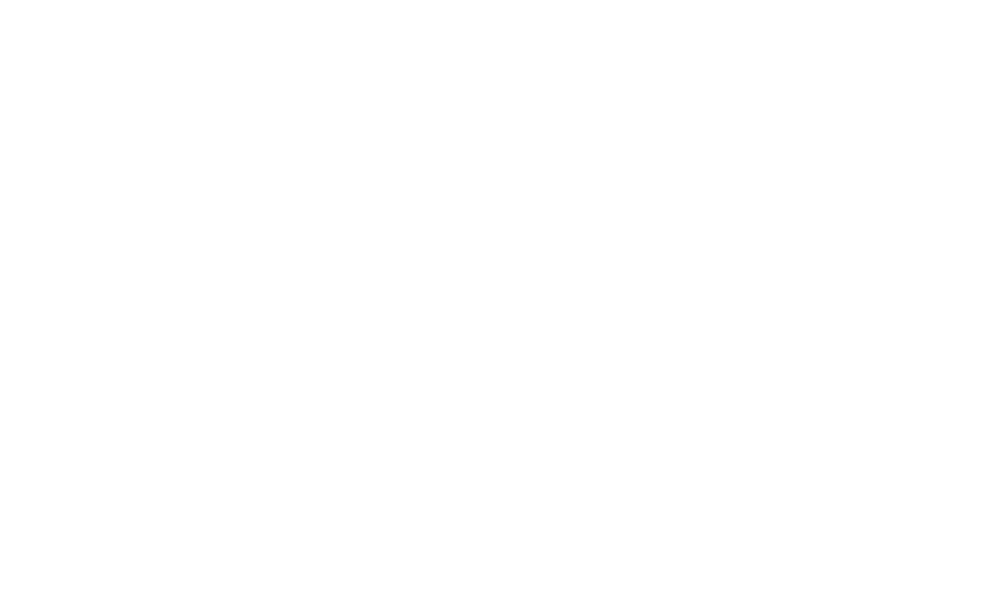

In [5]:
%matplotlib notebook
fig = plt.figure(figsize=(10,6))
ax = axes3d.Axes3D(fig)

for i in range(0,len(wave)):
    
    ntime = []
    
    for k in range(0,len(wave[i])):
        
        ntime.append(time[i])
    
    ax.scatter3D(ntime,wave[i],flux[i], c='k')
    
    
plt.show()

In [6]:
final_gradey = np.linspace(2000, 9200, 721)

In [7]:
xx = []
zz = []
factors = []

In [8]:
final_gradey[200]

4000.0

In [9]:
c = 200

In [10]:
for i in range(0,len(wave)):
    
    interpolation = interp1d(wave[i], flux[i])
    
    if min(wave[i]) <final_gradey[c]< max(wave[i]):
    
        xx.append([time[i]])
        zz.append(interpolation(final_gradey[c]))
    
factors.append(max(zz))
zz = zz/max(zz)

In [11]:
kernel = 1* RBF(length_scale=5.0, length_scale_bounds=(1, 20)) + WhiteKernel(noise_level=1e-1, noise_level_bounds=(1e-5, 0.5))

In [12]:
X_ = np.linspace(-10, 50, 60 + 1)

In [13]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.0).fit(xx, zz)

score = gp.score(xx, zz)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)

<IPython.core.display.Javascript object>


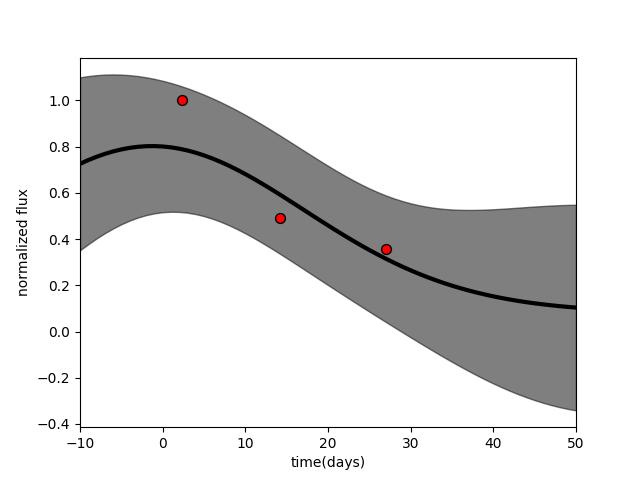

In [14]:
%matplotlib notebook

plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),y_mean + np.sqrt(np.diag(y_cov)),alpha=0.5, color='k')
plt.scatter(xx, zz, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.xlim(-10,50)
plt.xlabel("time(days)")
plt.ylabel("normalized flux")
plt.show()

In [15]:
score

0.8670849923102558